Populating the interactive namespace from numpy and matplotlib
Shape of the image (43247,)


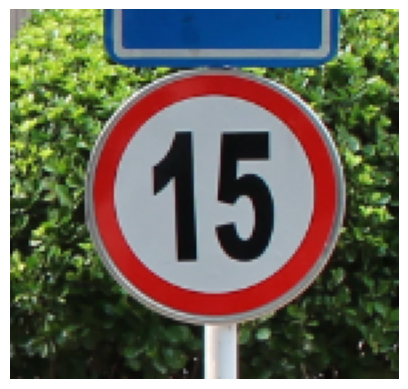

Shape of the image (39895,)


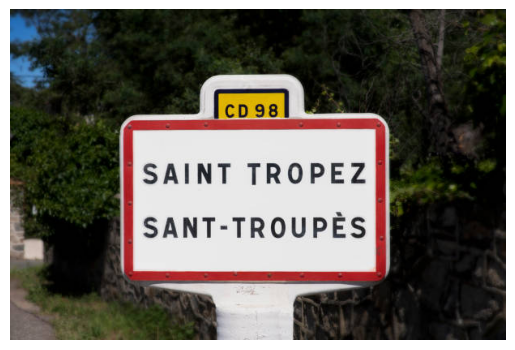

In [35]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

%pylab inline

url_code = r'https://github.com/Rianesmili/projet-detection-panneau-tf/blob/main/Paneau/paneau_du_code_de_la_route.png?raw=true'
resp = requests.get(url_code, stream=True).raw
image_array_code = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_code.shape}')
image_code = cv2.imdecode(image_array_code, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_code, cv2.COLOR_BGR2RGB))
plt.show()

url_ville = r'https://github.com/Rianesmili/projet-detection-panneau-tf/blob/main/Paneau/paneau_de_ville.jpg?raw=true'
resp = requests.get(url_ville, stream=True).raw
image_array_ville = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_ville.shape}')
image_ville = cv2.imdecode(image_array_ville, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_ville, cv2.COLOR_BGR2RGB))
plt.show()

(40, 40, 3)
(40, 40)
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  

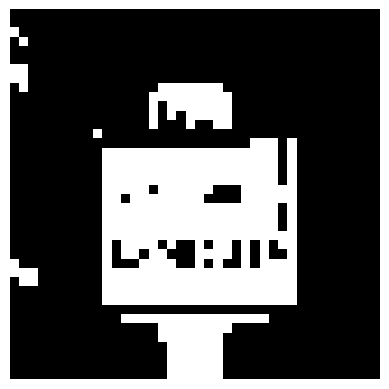

(40, 40, 3)
(40, 40)
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  

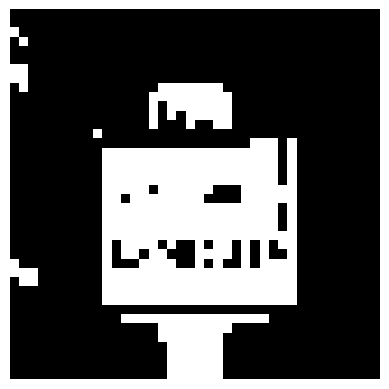

(40, 40, 3)
(40, 40)
255  255  255  255  000  255  255  255  255  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  000  255  000  255  255  000  000  
255  255  000  255  255  255  000  000  255  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  000  000  255  000  255  255  255  
255  255  255  255  255  255  255  255  000  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  000  000  000  000  000  255  000  
255  255  255  255  255  255  000  000  255  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  000  000  255  000  255  255  000  
255  255  255  255  000  000  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  

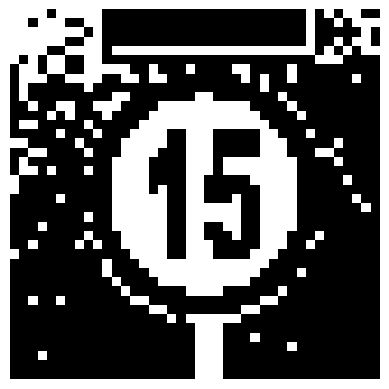

In [36]:
res = cv2.resize(image_ville , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

res = cv2.resize(image_ville , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)

res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

res = cv2.resize(image_code, dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)

res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res

for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

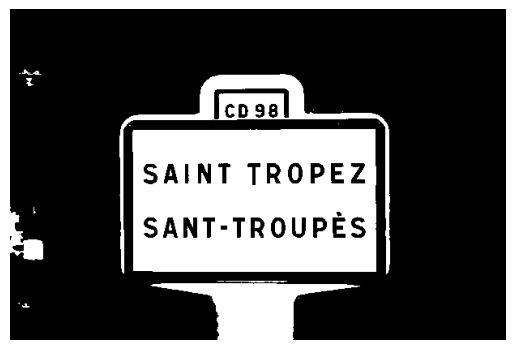

In [41]:
#Convert to bw
img_bw = cv2.imdecode(image_array_ville, cv2.IMREAD_GRAYSCALE)
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

[[0 0 0]
 [0 1 0]
 [0 0 0]]


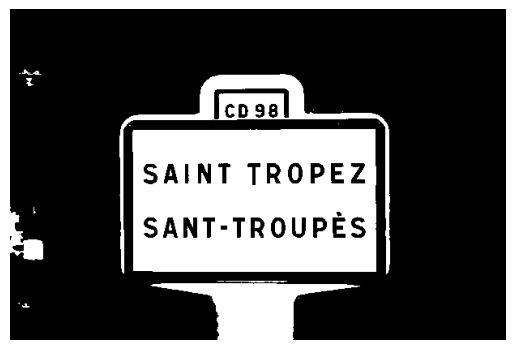

In [42]:
#defining an identity kernel, will change nothing because each pixel will remain with is value
kernel = np.matrix([[0,0,0],[0,1,0],[0,0,0]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


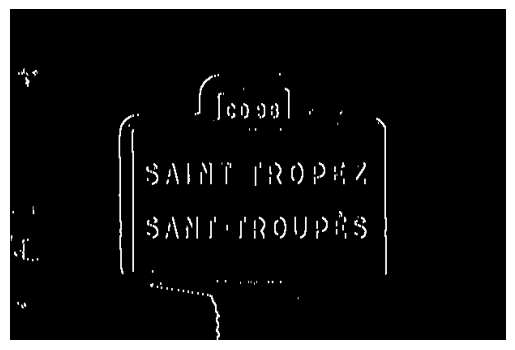

In [43]:
#defining a vertical edge detection kernel
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


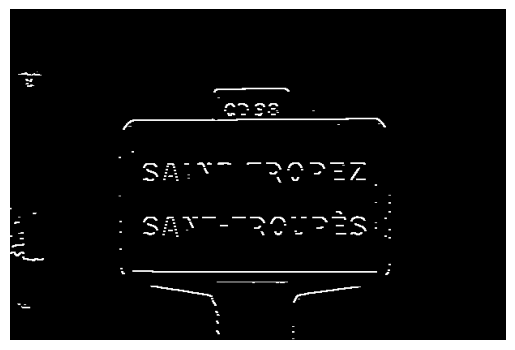

In [44]:
#defining an horizontal edge detection kernel
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

On telecharge et dezip le fichier qui contient notre dataset

In [45]:
#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/Rianesmili/projet-detection-panneau-tf/blob/main/Paneau/dataset.zip?raw=true",
    extract=False)

data_test_dir = tf.keras.utils.get_file(
    "test_data.zip",
    "https://github.com/Rianesmili/projet-detection-panneau-tf/blob/main/Paneau/test_data.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

with zipfile.ZipFile(data_test_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/test')

data_dir = pathlib.Path('/content/datasets/dataset')
data_test_dir = pathlib.Path('/content/datasets/test')

print(data_dir)
print(os.path.abspath(data_dir))

/content/datasets/dataset
/content/datasets/dataset


In [46]:
#on liste le nombre d'l'ement de notre dataset
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

1867


In [47]:
# rm -rf /content/datasets/test_data

In [48]:
#on liste le nombre d'l'ement de notre dataset
image_count = len(list(data_test_dir.glob('*/*')))
print(image_count)

1199


On vas utiliser une fonctionkeras  pour pre processer le jeu de deonnée pour les mettre dans la meme taailel et de les grouper pour les envoyer en groupe via un btach

batch_size = 3
img_height = 200
img_width = 200

In [49]:
batch_size = 32
img_height = 200
img_width = 200

Dans ce code il ne permet que chaque classe correspond a un folder du meme nom

Construire le jeux entrainement


In [50]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

Found 1867 files belonging to 2 classes.
Using 1494 files for training.


Construire le jeux de validation

In [51]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1867 files belonging to 2 classes.
Using 373 files for validation.


In [52]:
class_names = train_data.class_names
print(class_names)

['panneau_code_de_la_route', 'panneau_de_ville']


Un echantillion correspandant au batch size on a batch size = 4 on vas avoir quatres images

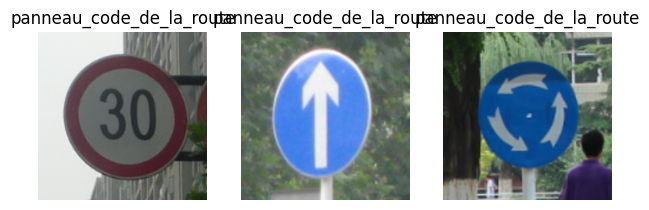

In [53]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Définition du reseau de neurones convolutionnel



In [54]:
from tensorflow.keras import layers

num_classes =  2 #

model = tf.keras.Sequential([ #kerasSequantial qui vas nous servir de conteneur
    layers.experimental.preprocessing.Rescaling(1./255), #rescaling
                              #definir les differantes couches
    layers.Conv2D(128,4, activation='relu'),  #couche de convolution
    layers.MaxPooling2D(), # couche de pooling
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    #layers.Conv2D(16,4, activation='relu'),
    #layers.MaxPooling2D(), #max pooling prend le maximum a chaque fois il exsite d'autres qui prennent la moyenne avrege
    #ces couches seront une suite de convolution et de poolig aui seront de plus en plus petit
    #layers.Conv2D(8,4, activation='relu'),
    #layers.MaxPooling2D(),
    layers.Flatten(), #flatten permet de construire un vecteur a partir de la matrice
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax') #softmax pour avoir la probabilité entre les differantes classes
])

On vas alors compiler notre model que l'on a défini

In [55]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

In [56]:
logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

In [57]:
model.fit(
    train_data,
  validation_data=val_data,
  epochs=20, #on entraine le model sur 20 epochs
  callbacks=[tensorboard_callback]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 9s 127ms/step - loss: 0.2863 - accuracy: 0.9290 - val_loss: 0.0630 - val_accuracy: 0.9812
Epoch 2/20
47/47 [==============================] - 6s 126ms/step - loss: 0.0418 - accuracy: 0.9846 - val_loss: 0.0457 - val_accuracy: 0.9866
Epoch 3/20
47/47 [==============================] - 8s 165ms/step - loss: 0.0275 - accuracy: 0.9900 - val_loss: 0.0163 - val_accuracy: 0.9946
Epoch 4/20
47/47 [==============================] - 9s 171ms/step - loss: 0.0203 - accuracy: 0.9960 - val_loss: 0.0084 - val_accuracy: 0.9973
Epoch 5/20
47/47 [==============================] - 7s 137ms/step - loss: 4.1912e-04 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9920
Epoch 6/20
47/47 [==============================] - 7s 137ms/step - loss: 1.1118e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9973
Epoch 7/20
47/47 [==============================] - 6s 122ms/step - loss: 3.4312e-05 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 0.9973
Epoch

Afficher l'integralitée du réseau de neurones

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 98, 98, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 47, 47, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 32)       

Tester avec une image uploadé

Saving istockphoto-1217844987-612x612.jpg to istockphoto-1217844987-612x612 (1).jpg


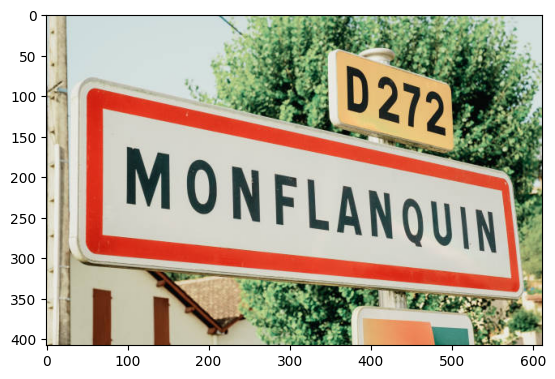

1/1 [==============================] - 0s 32ms/step


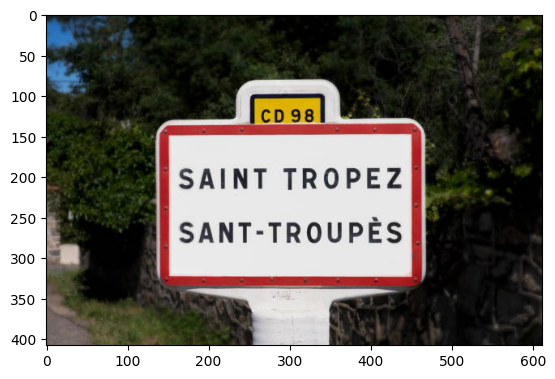

C'est un panneau de ville !


In [63]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

file_to_predict = files.upload()

for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_, cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()

    img_to_predict = np.expand_dims(cv2.resize(image_to_predict, (200, 200)), axis=0)
    predictions = model.predict(img_to_predict)
    class_index = np.argmax(predictions)  # Obtenez l'index de la classe prédite

    if class_index == 0:
        # Si la classe prédite est "panneau du code de la route"
        plt.imshow(cv2.cvtColor(image_code, cv2.COLOR_BGR2RGB))
        plt.show()
        print("C'est un panneau de code de la route !")
    elif class_index == 1:
        # Si la classe prédite est "panneau DE VILLE"
        plt.imshow(cv2.cvtColor(image_ville, cv2.COLOR_BGR2RGB))
        plt.show()
        print("C'est un panneau de ville !")

In [61]:
print(class_names)

['panneau_code_de_la_route', 'panneau_de_ville']


**Debut Converssion en TFLITE**

In [65]:
# Sauvegardez le modèle au format SavedModel
model.save("mon_modele")

In [66]:
#charger le model
loaded_model = tf.keras.models.load_model("mon_modele")

In [67]:
# Convertissez le modèle en TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Sauvegardez le modèle TFLite dans un fichier
with open('mon_modele.tflite', 'wb') as f:
    f.write(tflite_model)

TEST DU MODEL LITE

In [68]:
interpreter = tf.lite.Interpreter(model_path="mon_modele.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()